In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# ============================
# 1) Load Dataset
# ============================
df = pd.read_csv("train_u6lujuX_CVtuZ9i (1).csv")

# Drop Loan_ID (identifier)
df.drop(columns=["Loan_ID"], inplace=True)

# Create TotalIncome feature
df["TotalIncome"] = df["ApplicantIncome"] + df["CoapplicantIncome"]

# Convert Dependents "3+" → "3"
df["Dependents"] = df["Dependents"].replace("3+", "3")

# Map target variable: Y → 1, N → 0
df["Loan_Status"] = df["Loan_Status"].map({"Y": 1, "N": 0})

# ============================
# 2) Select Features & Target
# ============================
features = [
    "Gender", "Married", "Dependents", "Education", "Self_Employed",
    "Credit_History", "Property_Area", "LoanAmount",
    "Loan_Amount_Term", "TotalIncome"
]

X = df[features]
y = df["Loan_Status"]

# ============================
# 3) Define Numeric & Categorical Columns
# ============================
numeric_features = ["LoanAmount", "Loan_Amount_Term", "TotalIncome", "Credit_History"]
categorical_features = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"]

# ============================
# 4) Preprocessing Pipelines
# ============================

# Numeric pipeline → impute (median) + scale
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical pipeline → impute (most frequent) + OneHot Encoding
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combined preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# ============================
# 5) Train/Test Split (70/30)
# ============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    stratify=y,
    random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# ============================
# 6) Fit Preprocessing Only
# ============================
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

print("Preprocessed training shape:", X_train_prepared.shape)
print("Preprocessed testing shape:", X_test_prepared.shape)


Training set shape: (429, 10)
Testing set shape: (185, 10)
Preprocessed training shape: (429, 19)
Preprocessed testing shape: (185, 19)


In [9]:
# =============================
# 📌 Logistic Regression Model Training
# =============================

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# ---------------------------------------------------
# 1) Create a full pipeline:
#    - Preprocessing (that we built earlier)
#    - Logistic Regression model
# ---------------------------------------------------

log_reg_model = Pipeline(steps=[
    ("preprocessing", preprocessor),          # خطوات الـ preprocessing التي عملناها
    ("classifier", LogisticRegression())      # نموذج الانحدار اللوجستي
])

# ---------------------------------------------------
# 2) Train the model on training data
# ---------------------------------------------------
log_reg_model.fit(X_train, y_train)
# شرح: هنا يتم تدريب النموذج على بيانات التدريب بعد تطبيق كل خطوات الـ preprocessing عليها.

# ---------------------------------------------------
# 3) Evaluate the model on test data
# ---------------------------------------------------
log_reg_accuracy = log_reg_model.score(X_test, y_test)
# شرح: score يعطي دقة النموذج accuracy

print("Logistic Regression Accuracy:", log_reg_accuracy)


Logistic Regression Accuracy: 0.8540540540540541


In [11]:
# =====================================================
# 📌 Logistic Regression with Different Penalties (L1 & L2)
# =====================================================

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# -----------------------------------------------------
# 1) Logistic Regression with L2 regularization (default)
# -----------------------------------------------------

log_reg_L2 = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(penalty='l2', solver='lbfgs', max_iter=200))
])

# Train
log_reg_L2.fit(X_train, y_train)

# Accuracy
acc_L2 = log_reg_L2.score(X_test, y_test)
print("Logistic Regression (L2) Accuracy:", acc_L2)


# -----------------------------------------------------
# 2) Logistic Regression with L1 regularization
# -----------------------------------------------------
# ملاحظة: penalty='l1' يحتاج solver اسمه 'liblinear' أو 'saga'

log_reg_L1 = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(penalty='l1', solver='liblinear', max_iter=200))
])

# Train
log_reg_L1.fit(X_train, y_train)

# Accuracy
acc_L1 = log_reg_L1.score(X_test, y_test)
print("Logistic Regression (L1) Accuracy:", acc_L1)


Logistic Regression (L2) Accuracy: 0.8540540540540541
Logistic Regression (L1) Accuracy: 0.8486486486486486


In [13]:
# ===========================================
# 📌 Evaluate Logistic Regression Models (L1 & L2)
# ===========================================

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ------------------------------------------------
# 1) Predict using both models
# ------------------------------------------------

y_pred_L2 = log_reg_L2.predict(X_test)
y_pred_L1 = log_reg_L1.predict(X_test)

# ------------------------------------------------
# 2) Define a function to print evaluation metrics
# ------------------------------------------------

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n===== {model_name} =====")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, pos_label="Y"))
    print("Recall   :", recall_score(y_true, y_pred, pos_label="Y"))
    print("F1 Score :", f1_score(y_true, y_pred, pos_label="Y"))

# ------------------------------------------------
# 3) Evaluate both models
# ------------------------------------------------

evaluate_model(y_test, y_pred_L2, "Logistic Regression (L2 Penalty)")
evaluate_model(y_test, y_pred_L1, "Logistic Regression (L1 Penalty)")



===== Logistic Regression (L2 Penalty) =====
Accuracy : 0.8540540540540541


ValueError: pos_label=Y is not a valid label. It should be one of [0, 1]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict
y_pred_L2 = log_reg_L2.predict(X_test)
y_pred_L1 = log_reg_L1.predict(X_test)

# Function to evaluate model
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n===== {model_name} =====")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, pos_label=1))
    print("Recall   :", recall_score(y_true, y_pred, pos_label=1))
    print("F1 Score :", f1_score(y_true, y_pred, pos_label=1))

# Evaluate both models
evaluate_model(y_test, y_pred_L2, "Logistic Regression (L2 Penalty)")
evaluate_model(y_test, y_pred_L1, "Logistic Regression (L1 Penalty)")


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# --------------------------------------------
# 1) Define pipeline (preprocessing + classifier)
# --------------------------------------------
pipe = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(solver='liblinear', max_iter=500, random_state=42))
])

# --------------------------------------------
# 2) Define hyperparameter grid
# --------------------------------------------
param_grid = {
    "classifier__penalty": ["l1", "l2"],   # نوع الـ Regularization
    "classifier__C": [0.01, 0.1, 1, 10, 100]  # قوة الـ regularization
}

# --------------------------------------------
# 3) Setup GridSearchCV
# --------------------------------------------
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',   # يمكن تغييره إلى 'roc_auc' إذا أردت
    n_jobs=-1,
    verbose=1
)

# --------------------------------------------
# 4) Train model (fit GridSearchCV)
# --------------------------------------------
grid.fit(X_train, y_train)

# --------------------------------------------
# 5) Best parameters and score
# --------------------------------------------
print("Best parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

# --------------------------------------------
# 6) Evaluate on test set
# --------------------------------------------
y_pred = grid.predict(X_test)

print("\nTest set evaluation:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label=1))
print("Recall   :", recall_score(y_test, y_pred, pos_label=1))
print("F1 Score :", f1_score(y_test, y_pred, pos_label=1))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# ---------------------------------------------------
# 1) Define pipeline (preprocessing + LogisticRegression)
# ---------------------------------------------------
pipe = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, random_state=42))
])

# ---------------------------------------------------
# 2) Define hyperparameter grid
# ---------------------------------------------------
param_grid = {
    "classifier__penalty": ["l1", "l2", "elasticnet", "none"],    # أنواع regularization
    "classifier__C": [0.01, 0.1, 1, 10, 100],                    # قوة regularization
    "classifier__solver": ["saga"],                               # 'saga' يدعم elasticnet و l1/l2
    "classifier__l1_ratio": [0, 0.5, 0.7, 1]                     # فقط لـ elasticnet
}

# ---------------------------------------------------
# 3) Setup GridSearchCV
# ---------------------------------------------------
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',      # يمكن تغييره إلى 'roc_auc' حسب الرغبة
    n_jobs=-1,
    verbose=1
)

# ---------------------------------------------------
# 4) Train model (fit GridSearchCV)
# ---------------------------------------------------
grid.fit(X_train, y_train)

# ---------------------------------------------------
# 5) Best parameters & best CV score
# ---------------------------------------------------
print("Best parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

# ---------------------------------------------------
# 6) Evaluate on test set
# ---------------------------------------------------
y_pred = grid.predict(X_test)

print("\nTest set evaluation:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label=1))
print("Recall   :", recall_score(y_test, y_pred, pos_label=1))
print("F1 Score :", f1_score(y_test, y_pred, pos_label=1))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters: {'classifier__C': 0.01, 'classifier__l1_ratio': 0, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best CV Accuracy: 0.7924760601915185

Test set evaluation:
Accuracy : 0.8486486486486486
Precision: 0.8278145695364238
Recall   : 0.984251968503937
F1 Score : 0.8992805755395683

Confusion Matrix:
[[ 32  26]
 [  2 125]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9412    0.5517    0.6957        58
           1     0.8278    0.9843    0.8993       127

    accuracy                         0.8486       185
   macro avg     0.8845    0.7680    0.7975       185
weighted avg     0.8634    0.8486    0.8354       185



C:\Users\LEGION\.anaconda\anacoda 4\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
100 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LEGION\.anaconda\anacoda 4\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LEGION\.anaconda\anacoda 4\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\LEGION\.anaconda\anacoda 4\Lib\site-packages\sklearn\pipeline.py", 

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# ---------------------------------------------------
# 1) Pipeline (Preprocessing + Logistic Regression)
# ---------------------------------------------------
pipe = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, random_state=42))
])

# ---------------------------------------------------
# 2) Hyperparameter grid
# ---------------------------------------------------
param_grid = {
    "classifier__penalty": ["l1", "l2", "elasticnet", "none"],  # أنواع regularization
    "classifier__C": [0.01, 0.1, 1, 10, 100],                  # قوة regularization
    "classifier__solver": ["saga"],                             # saga يدعم elasticnet و l1/l2
    "classifier__l1_ratio": [0, 0.5, 0.7, 1]                   # فقط لـ elasticnet
}

# ---------------------------------------------------
# 3) GridSearchCV with stratified folds for balanced splits
# ---------------------------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# ---------------------------------------------------
# 4) Fit GridSearchCV
# ---------------------------------------------------
grid.fit(X_train, y_train)

# ---------------------------------------------------
# 5) Best parameters and CV score
# ---------------------------------------------------
print("===== Best Parameters =====")
print(grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

# ---------------------------------------------------
# 6) Evaluate best model on test set
# ---------------------------------------------------
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("\n===== Test Set Evaluation =====")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label=1))
print("Recall   :", recall_score(y_test, y_pred, pos_label=1))
print("F1 Score :", f1_score(y_test, y_pred, pos_label=1))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


Fitting 5 folds for each of 80 candidates, totalling 400 fits
===== Best Parameters =====
{'classifier__C': 0.01, 'classifier__l1_ratio': 0, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best Cross-Validation Accuracy: 0.7924760601915185

===== Test Set Evaluation =====
Accuracy : 0.8486486486486486
Precision: 0.8278145695364238
Recall   : 0.984251968503937
F1 Score : 0.8992805755395683

Confusion Matrix:
[[ 32  26]
 [  2 125]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9412    0.5517    0.6957        58
           1     0.8278    0.9843    0.8993       127

    accuracy                         0.8486       185
   macro avg     0.8845    0.7680    0.7975       185
weighted avg     0.8634    0.8486    0.8354       185



C:\Users\LEGION\.anaconda\anacoda 4\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
100 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LEGION\.anaconda\anacoda 4\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LEGION\.anaconda\anacoda 4\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\LEGION\.anaconda\anacoda 4\Lib\site-packages\sklearn\pipeline.py", 

In [47]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
1,4583,1508.0,128.0,360.0,1.0,True,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,False,True,False,False,False,...,True,True,False,False,False,False,True,False,True,True
3,2583,2358.0,120.0,360.0,1.0,False,False,True,False,False,...,True,True,False,False,False,True,False,False,True,True
4,6000,0.0,141.0,360.0,1.0,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,True


In [55]:
# 1) Fill missing numeric values (LoanAmount, Loan_Amount_Term, etc.)
df.fillna(df.median(numeric_only=True), inplace=True)

# 2) Split X, y
X = df.drop("Loan_Status_Y", axis=1)
y = df["Loan_Status_Y"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


Accuracy: 0.7027027027027027
Precision: 0.8103448275862069
Recall: 0.7401574803149606
F1 Score: 0.7736625514403292


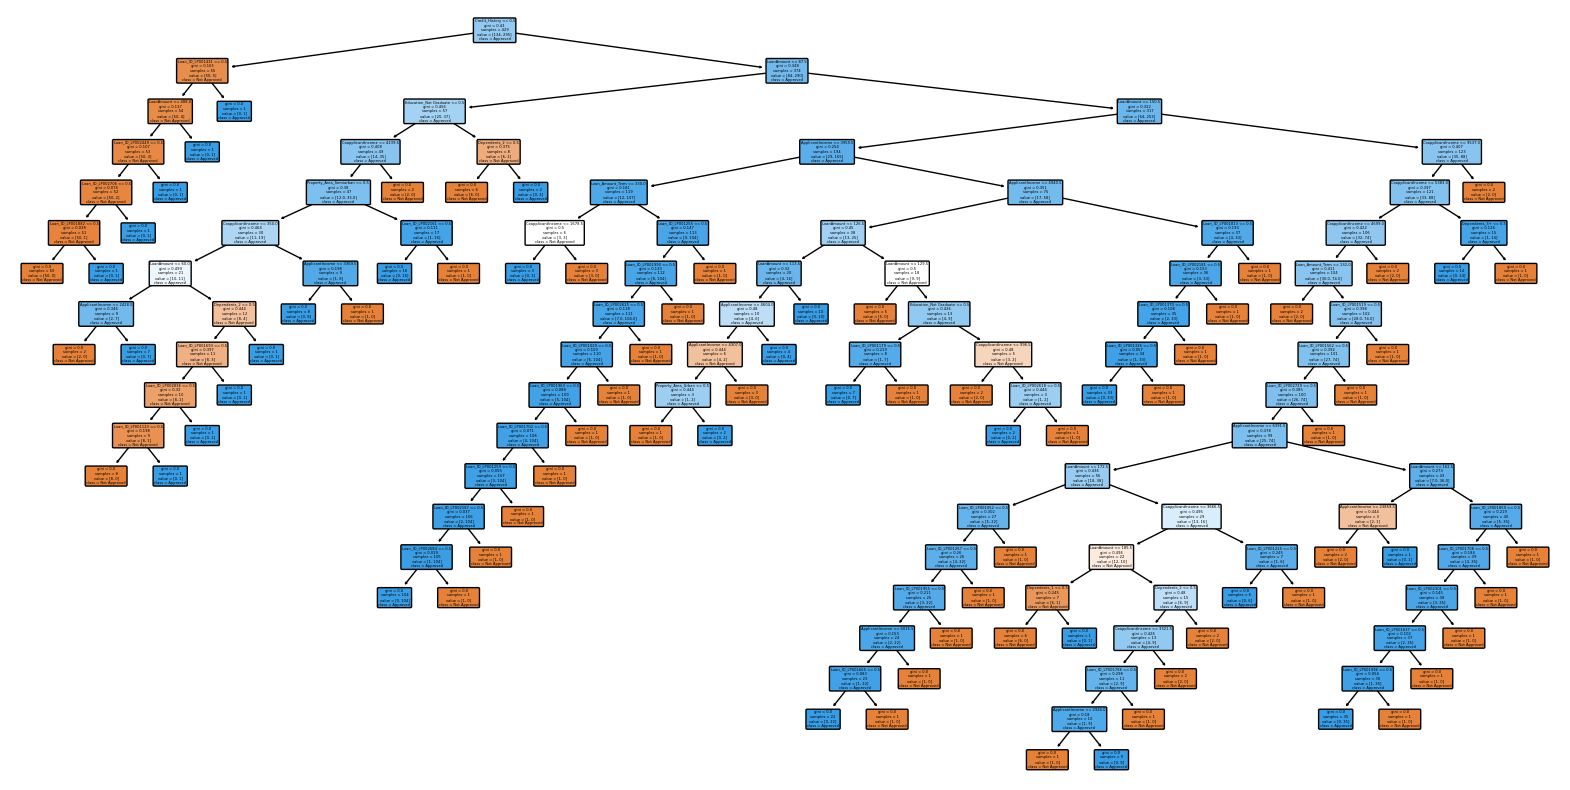

In [57]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Baseline Decision Tree
dt = DecisionTreeClassifier(criterion='gini', random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=['Not Approved','Approved'], filled=True, rounded=True)
plt.show()


In [59]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

# لتخزين النتائج لكل تجربة
results = []

# نجرب criteria مختلفة
criteria = ['gini', 'entropy']

for crit in criteria:
    dt = DecisionTreeClassifier(criterion=crit, random_state=42)
    dt.fit(X_train, y_train)  # تدريب الموديل
    y_pred = dt.predict(X_test)  # توقع النتائج على التست

    # تخزين النتائج في قائمة
    results.append({
        "Criterion": crit,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

# تحويل النتائج إلى DataFrame لسهولة العرض
baseline_results = pd.DataFrame(results)
baseline_results


,Criterion,Accuracy,Precision,Recall,F1 Score
0,gini,0.702703,0.810345,0.740157,0.773663
1,entropy,0.691892,0.836538,0.685039,0.753247


In [61]:
params_results = []

# تجربة مجموعة مختلفة من الإعدادات
for depth in [3, 5, 7, None]:
    for split in [2, 5, 10]:
        for leaf in [1, 2, 4]:
            dt = DecisionTreeClassifier(
                criterion='gini', 
                max_depth=depth,
                min_samples_split=split,
                min_samples_leaf=leaf,
                random_state=42
            )
            
            dt.fit(X_train, y_train)
            y_pred = dt.predict(X_test)

            params_results.append({
                "max_depth": depth,
                "min_samples_split": split,
                "min_samples_leaf": leaf,
                "Accuracy": accuracy_score(y_test, y_pred),
                "Precision": precision_score(y_test, y_pred),
                "Recall": recall_score(y_test, y_pred),
                "F1": f1_score(y_test, y_pred)
            })

# عرض أفضل 10 إعدادات حسب Accuracy
params_df = pd.DataFrame(params_results)
params_df.sort_values(by="Accuracy", ascending=False).head(10)


,max_depth,min_samples_split,min_samples_leaf,Accuracy,Precision,Recall,F1
1,3.0,2,2,0.810811,0.828571,0.913386,0.868914
7,3.0,10,2,0.810811,0.828571,0.913386,0.868914
2,3.0,2,4,0.810811,0.828571,0.913386,0.868914
8,3.0,10,4,0.810811,0.828571,0.913386,0.868914
4,3.0,5,2,0.810811,0.828571,0.913386,0.868914
5,3.0,5,4,0.810811,0.828571,0.913386,0.868914
0,3.0,2,1,0.805405,0.822695,0.913386,0.865672
6,3.0,10,1,0.805405,0.822695,0.913386,0.865672
3,3.0,5,1,0.805405,0.822695,0.913386,0.865672
10,5.0,2,2,0.783784,0.827068,0.866142,0.846154


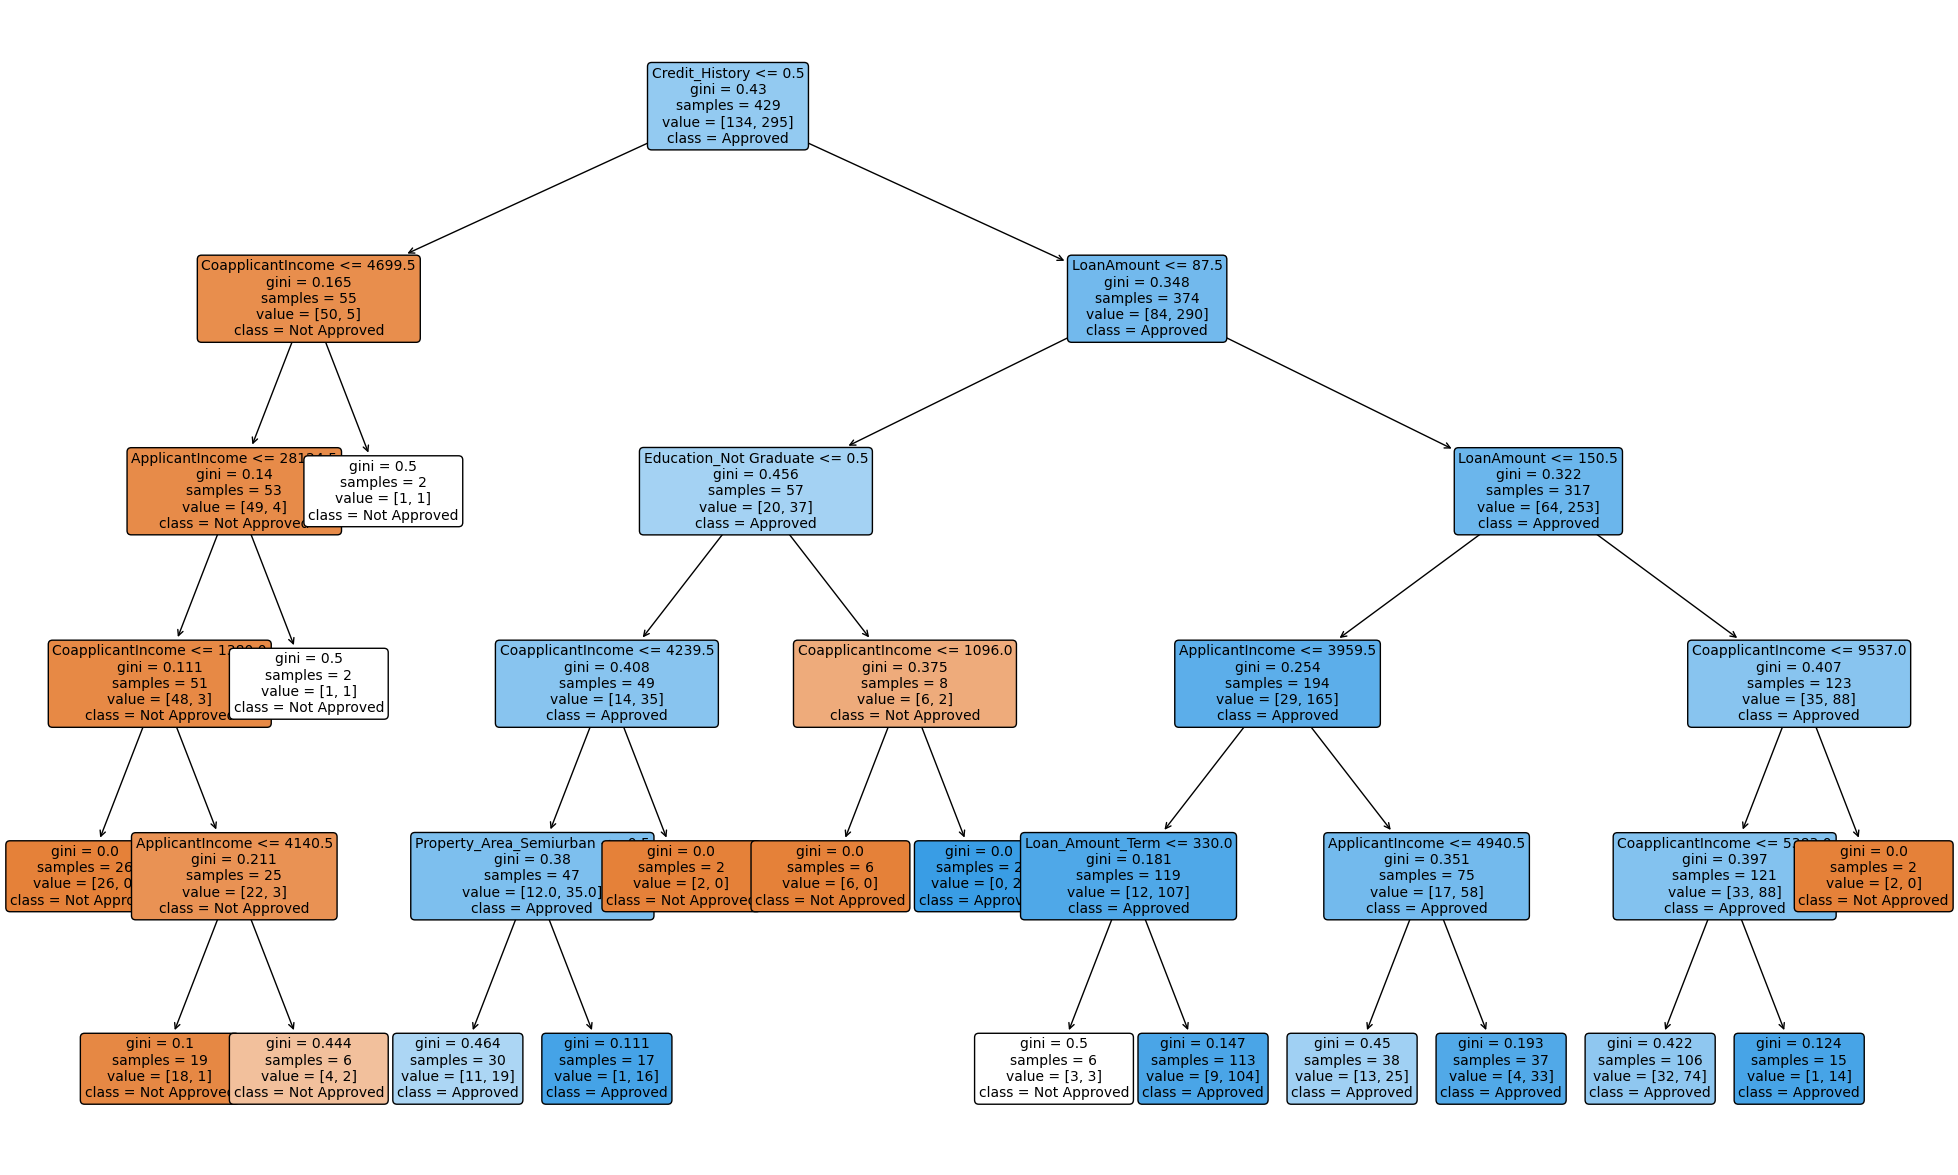

In [63]:
best_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,           # مثال
    min_samples_split=5,   # مثال
    min_samples_leaf=2,    # مثال
    random_state=42
)

best_tree.fit(X_train, y_train)

plt.figure(figsize=(25, 15))
plot_tree(best_tree, 
          feature_names=X_train.columns,
          class_names=['Not Approved', 'Approved'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()


In [65]:
importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": best_tree.feature_importances_
}).sort_values(by="Importance", ascending=False)

importances


,Feature,Importance
4,Credit_History,0.627882
1,CoapplicantIncome,0.135898
0,ApplicantIncome,0.069557
2,LoanAmount,0.068353
623,Education_Not Graduate,0.041433
...,...,...
211,Loan_ID_LP001698,0.000000
212,Loan_ID_LP001699,0.000000
213,Loan_ID_LP001702,0.000000
214,Loan_ID_LP001708,0.000000


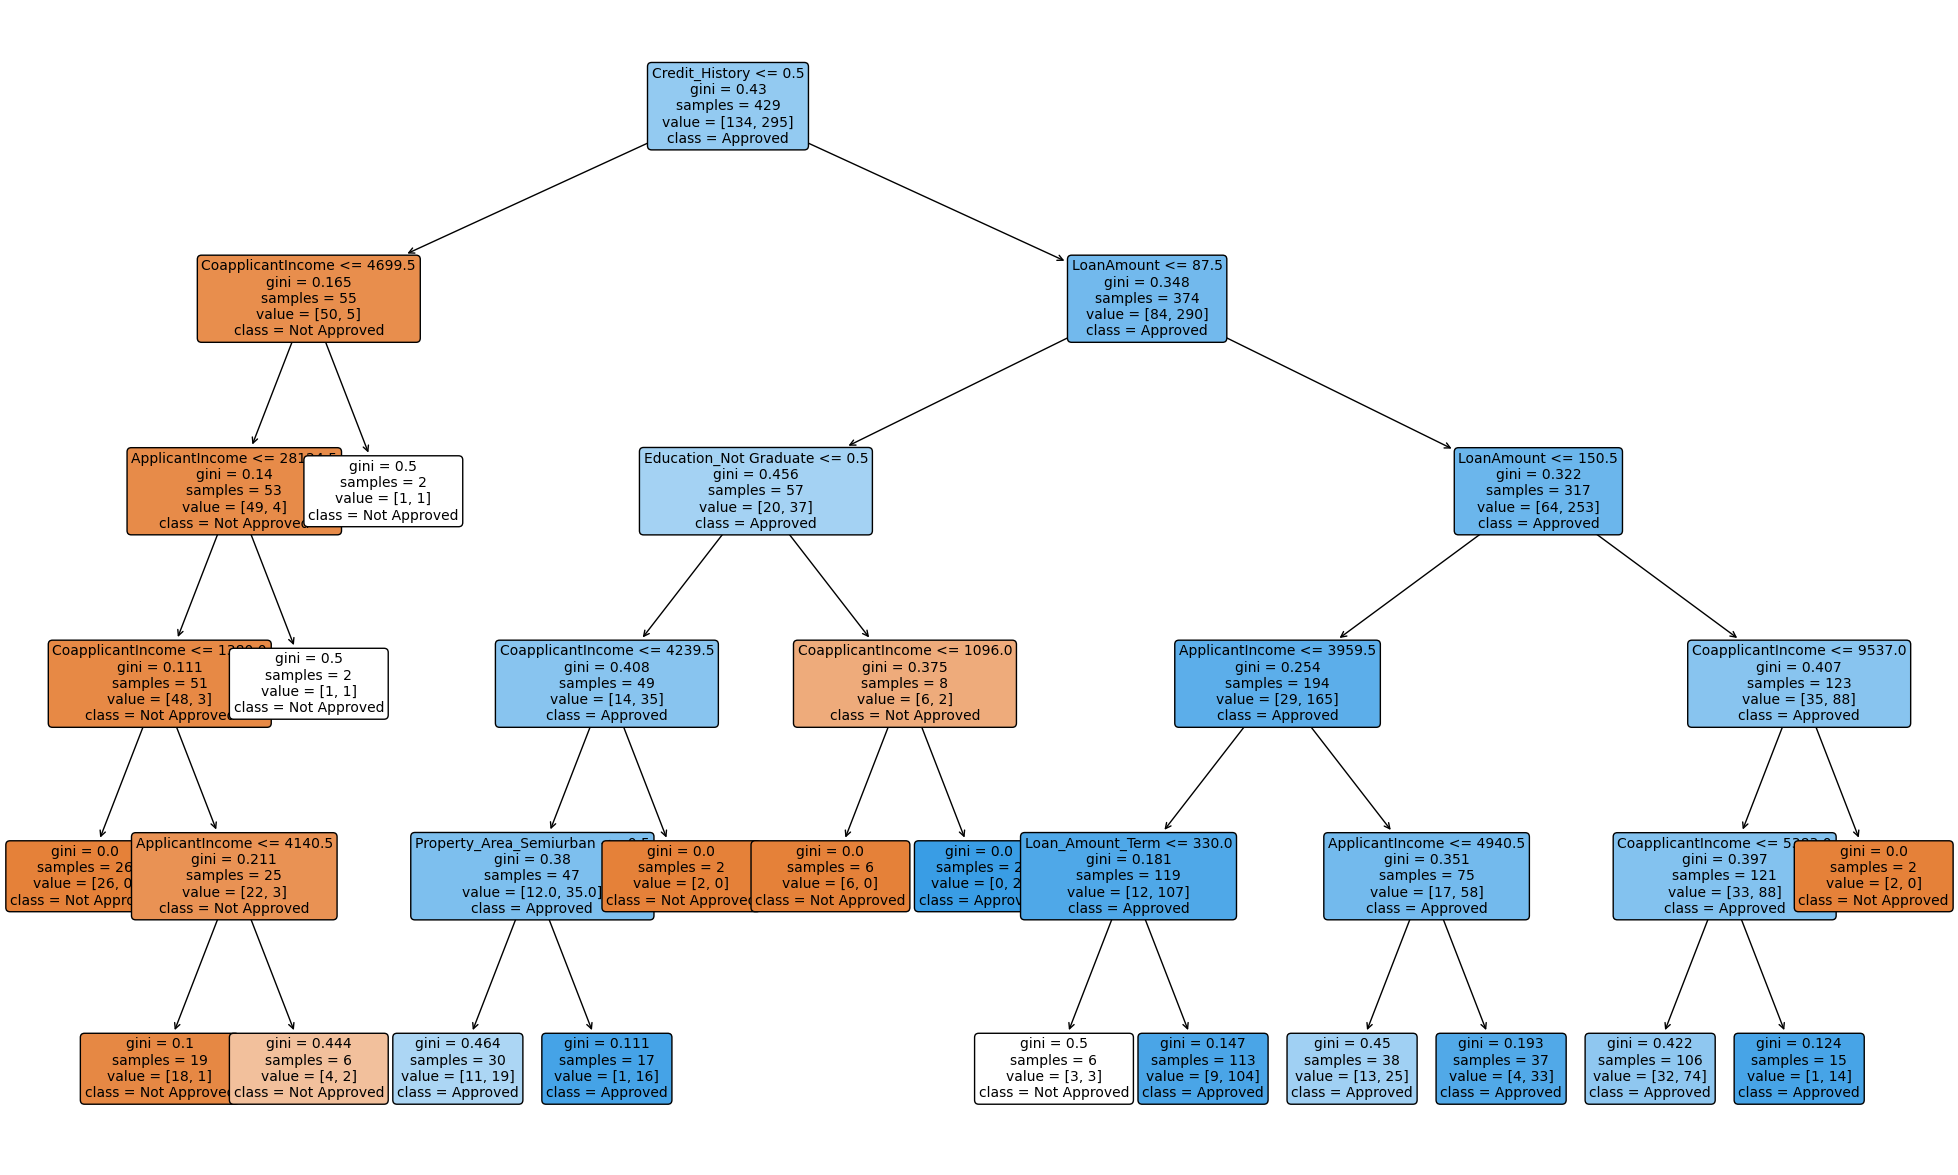

In [67]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# افترض أن best_tree هو الموديل المدرب (DecisionTreeClassifier)
plt.figure(figsize=(25, 15))  # حجم الرسم
plot_tree(
    best_tree,                  # الموديل المدرب
    feature_names=X_train.columns,  # أسماء الأعمدة
    class_names=['Not Approved', 'Approved'],  # أسماء الفئات
    filled=True,                # تلوين العقد حسب الفئة
    rounded=True,               # جعل العقد دائرية
    fontsize=10
)
plt.show()


In [69]:
import pandas as pd

importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": best_tree.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(importances)


                    Feature  Importance
4            Credit_History    0.627882
1         CoapplicantIncome    0.135898
0           ApplicantIncome    0.069557
2                LoanAmount    0.068353
623  Education_Not Graduate    0.041433
..                      ...         ...
211        Loan_ID_LP001698    0.000000
212        Loan_ID_LP001699    0.000000
213        Loan_ID_LP001702    0.000000
214        Loan_ID_LP001708    0.000000
626     Property_Area_Urban    0.000000

[627 rows x 2 columns]


In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# نحدد موديل Decision Tree الأساسي
dtree = DecisionTreeClassifier(random_state=42)

# نحدد مجموعة القيم لكل hyperparameter للتجربة
param_grid = {
    "criterion": ["gini", "entropy"],          # معيار الانقسام
    "max_depth": [3, 5, 7, None],              # أقصى عمق للشجرة
    "min_samples_split": [2, 5, 10],           # أقل عدد من العينات لتقسيم العقدة
    "min_samples_leaf": [1, 2, 4]              # أقل عدد من العينات في الأوراق
}


In [75]:
grid_search = GridSearchCV(
    estimator=dtree,
    param_grid=param_grid,
    scoring="accuracy",   # يمكن تغييره إلى 'f1', 'precision', etc.
    cv=5,                 # Cross-validation 5-fold
    n_jobs=-1             # استخدام كل المعالجات المتاحة
)


In [77]:
grid_search.fit(X_train, y_train)  # تدريب على بيانات التدريب


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')